In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering, AffinityPropagation, MiniBatchKMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import os
curr_directory = os.getcwd()
datafile = curr_directory + "/all_recipe_data.json"

In [71]:
import json
raw_recipe_data = pd.read_json(datafile)

In [72]:
raw_recipe_data.isnull().values.any()

False

In [73]:
raw_recipe_data = raw_recipe_data.replace(np.nan, "", regex=True)
raw_recipe_data.head()

,Author,Instructions
0,[witchywoman],"Mix grapefruit, orange, apples, pineapple, mar..."
1,[witchywoman],Fill a margarita glass with crushed ice. Pour ...
2,[witchywoman],Preheat an oven to 350 degrees F (175 degrees ...
3,[witchywoman],
4,[witchywoman],"Mix the teriyaki sauce, garlic, ginger, and re..."


In [74]:
raw_recipe_data.isnull().sum()

Author          0
Instructions    0
dtype: int64

In [75]:
raw_recipe_data.head()

,Author,Instructions
0,[witchywoman],"Mix grapefruit, orange, apples, pineapple, mar..."
1,[witchywoman],Fill a margarita glass with crushed ice. Pour ...
2,[witchywoman],Preheat an oven to 350 degrees F (175 degrees ...
3,[witchywoman],
4,[witchywoman],"Mix the teriyaki sauce, garlic, ginger, and re..."


In [76]:
raw_recipe_data.drop(3, axis=0, inplace=True)

In [77]:
raw_recipe_data = raw_recipe_data[raw_recipe_data.Author != "exception"]

In [78]:
from string import punctuation

transtab = str.maketrans({key:None for key in punctuation if key != "."})

In [79]:
# remove punctuation
raw_recipe_data.Instructions = raw_recipe_data.Instructions.apply(lambda x: x.lower().translate(transtab).strip().split("."))
raw_recipe_data.head()

,Author,Instructions
0,[witchywoman],[mix grapefruit orange apples pineapple marasc...
1,[witchywoman],"[fill a margarita glass with crushed ice, pou..."
2,[witchywoman],[preheat an oven to 350 degrees f 175 degrees ...
4,[witchywoman],[mix the teriyaki sauce garlic ginger and red ...
5,[witchywoman],[fill a pint glass with ice and pour in the vo...


In [80]:
raw_recipe_data.Author = raw_recipe_data.Author.apply(lambda x: x[0])
raw_recipe_data.head()

,Author,Instructions
0,witchywoman,[mix grapefruit orange apples pineapple marasc...
1,witchywoman,"[fill a margarita glass with crushed ice, pou..."
2,witchywoman,[preheat an oven to 350 degrees f 175 degrees ...
4,witchywoman,[mix the teriyaki sauce garlic ginger and red ...
5,witchywoman,[fill a pint glass with ice and pour in the vo...


In [81]:
raw_recipe_data.head()

,Author,Instructions
0,witchywoman,[mix grapefruit orange apples pineapple marasc...
1,witchywoman,"[fill a margarita glass with crushed ice, pou..."
2,witchywoman,[preheat an oven to 350 degrees f 175 degrees ...
4,witchywoman,[mix the teriyaki sauce garlic ginger and red ...
5,witchywoman,[fill a pint glass with ice and pour in the vo...


In [82]:
raw_recipe_data.Instructions.iloc[0]

['mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl',
 ' mash slightly with the back of a wooden spoon to release juices',
 ' add bananas coconut walnuts and sugar stir to coat',
 ' cover and refrigerate to blend flavors at least 1 hour',
 '']

In [97]:
raw_recipe_data.loc[:,"FullInstruction"] = raw_recipe_data.Instructions.apply(lambda x: "".join(x))

'mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl mash slightly with the back of a wooden spoon to release juices add bananas coconut walnuts and sugar stir to coat cover and refrigerate to blend flavors at least 1 hour'

In [ ]:
# Get Instructions: List of list of sentences; DONE
# Flatten list of list of sentences -> List of sentences; DONE
# Remove stopwords from each sentence; DONE
# Create Train/Test split of sentences; DONE
# Pass Training set into Gensim; DONE

In [108]:
# get instructions
sentences = [text for text in raw_recipe_data.FullInstruction]
sentences[:3]

['mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl mash slightly with the back of a wooden spoon to release juices add bananas coconut walnuts and sugar stir to coat cover and refrigerate to blend flavors at least 1 hour',
 'fill a margarita glass with crushed ice pour tequila melon liqueur and triple sec into the glass top with sour mix grenadine lime juice and orange juice garnish with the cherry and a wedge of orange',
 'preheat an oven to 350 degrees f 175 degrees c grease 12 muffin cups or line with paper muffin liners stir the flour cinnamon nutmeg allspice cloves pumpkin pie spice cardamom ginger salt and baking soda together in a bowl beat the brown sugar and the eggs together with an electric mixer in a large bowl until smooth add 12 cup plus 2 tablespoons vegetable oil and pumpkin continue beating until integrated pour the flour mixture into the egg mixture and beat until just incorporated fill the prepared muffin cups about halffull with 

In [103]:
paragraphs = []

In [104]:
# flatten list of sentences
#from itertools import chain

#sentences = list(chain.from_iterable(sentences))

In [109]:
len(sentences)

225

In [110]:
sentences[:5]

['mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl mash slightly with the back of a wooden spoon to release juices add bananas coconut walnuts and sugar stir to coat cover and refrigerate to blend flavors at least 1 hour',
 'fill a margarita glass with crushed ice pour tequila melon liqueur and triple sec into the glass top with sour mix grenadine lime juice and orange juice garnish with the cherry and a wedge of orange',
 'preheat an oven to 350 degrees f 175 degrees c grease 12 muffin cups or line with paper muffin liners stir the flour cinnamon nutmeg allspice cloves pumpkin pie spice cardamom ginger salt and baking soda together in a bowl beat the brown sugar and the eggs together with an electric mixer in a large bowl until smooth add 12 cup plus 2 tablespoons vegetable oil and pumpkin continue beating until integrated pour the flour mixture into the egg mixture and beat until just incorporated fill the prepared muffin cups about halffull with 

In [111]:
# remove empty strings
clean_sentences = list(filter(None, sentences))

In [150]:
len(clean_sentences)

107

In [149]:
# remove stop words
stoplist = set('a an and are as aside at be by for from has he if in is it its of on onto or that the to was will with'.split(' '))
sentences_text = [[word for word in document.split() if word not in stoplist]
                  for document in clean_sentences]

In [151]:
len(sentences_text)

107

In [90]:
# flatten list of words of sentences
combined_text = list(chain.from_iterable(sentences_text))


In [152]:
np.random.shuffle(sentences_text)
train, test = sentences_text[:81], sentences_text[81:]

In [116]:
len(sentences_text)

107

In [93]:
sentences_text[:3]

[['small',
  'bowl',
  'mix',
  'together',
  'panko',
  'bread',
  'crumbs',
  'melted',
  'butter'],
 ['set', 'aside'],
 ['stir', 'eggs', 'peanut', 'butter', 'into', 'mixture']]

In [94]:
paragraphs = str.join(sentences_text)

TypeError: descriptor 'join' requires a 'str' object but received a 'list'

In [95]:
clean_sentences[:2]

['mix grapefruit orange apples pineapple maraschino cherries and grapes in a large bowl',
 ' mash slightly with the back of a wooden spoon to release juices']

In [117]:
train[:3]

[['preheat',
  'oven',
  '400',
  'degrees',
  'f',
  '200',
  'degrees',
  'c',
  'mix',
  'chickpeas',
  'nutritional',
  'yeast',
  'olive',
  'oil',
  'chili',
  'powder',
  'onion',
  'powder',
  'salt',
  'together',
  'bowl',
  'until',
  'combined',
  'spread',
  'evenly',
  'rimmed',
  'baking',
  'sheet',
  'bake',
  'preheated',
  'oven',
  'shaking',
  'pan',
  'occasionally',
  'redistribute',
  'chickpeas',
  'until',
  'crispy',
  '30',
  '40',
  'minutes'],
 ['preheat',
  'oven',
  '400',
  'degrees',
  'f',
  '200',
  'degrees',
  'c',
  'lightly',
  'grease',
  '2',
  'large',
  'baking',
  'sheets',
  'mix',
  'whole',
  'wheat',
  'flour',
  'cornmeal',
  'rolled',
  'oats',
  'baking',
  'powder',
  'together',
  'bowl',
  'lightly',
  'mix',
  'water',
  'applesauce',
  'vanilla',
  'extract',
  'into',
  'flour',
  'mixture',
  'stir',
  'eggs',
  'peanut',
  'butter',
  'into',
  'mixture',
  'turn',
  'dough',
  'onto',
  'floured',
  'surface',
  'knead',
  'u

In [118]:
training_list = list(chain.from_iterable(train))
testing_list = list(chain.from_iterable(test))
training_list[:3]

['preheat', 'oven', '400']

In [153]:
print(len(training_list), len(testing_list))

4678 1679


In [28]:
testing_list[:3]

['spray', '9x13', 'casserole']

In [154]:
# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [155]:
model = gensim.models.Word2Vec(train, min_count=6, sg=1, window=5, sample=1e-3)

2018-04-27 22:14:00,837 : INFO : collecting all words and their counts
2018-04-27 22:14:00,850 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-27 22:14:00,856 : INFO : collected 1037 word types from a corpus of 4675 raw words and 81 sentences
2018-04-27 22:14:00,859 : INFO : Loading a fresh vocabulary
2018-04-27 22:14:00,864 : INFO : min_count=6 retains 204 unique words (19% of original 1037, drops 833)
2018-04-27 22:14:00,866 : INFO : min_count=6 leaves 3178 word corpus (67% of original 4675, drops 1497)
2018-04-27 22:14:00,870 : INFO : deleting the raw counts dictionary of 1037 items
2018-04-27 22:14:00,873 : INFO : sample=0.001 downsamples 124 most-common words
2018-04-27 22:14:00,876 : INFO : downsampling leaves estimated 1910 word corpus (60.1% of prior 3178)
2018-04-27 22:14:00,879 : INFO : estimated required memory for 204 words and 100 dimensions: 265200 bytes
2018-04-27 22:14:00,881 : INFO : resetting layer weights
2018-04-27 22:14:00,889 : I

In [156]:
X = model[model.wv.vocab]

/Users/mnandi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [160]:
len(model.wv.vocab)

204

In [158]:
model.wv.similarity('boil','bake')

0.9993414404346159

In [159]:
model.wv.similar_by_word('cake')

2018-04-27 22:14:15,165 : INFO : precomputing L2-norms of word weight vectors


[('coffee', 0.9995493292808533),
 ('top', 0.9995473027229309),
 ('minutes', 0.9995185136795044),
 ('until', 0.9995099306106567),
 ('sprinkle', 0.9994871020317078),
 ('half', 0.9994817972183228),
 ('bake', 0.9994767904281616),
 ('cheese', 0.9994716644287109),
 ('preheated', 0.9994674324989319),
 ('2', 0.9994673132896423)]

In [162]:
pca_data.shape

(204, 2)

In [161]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

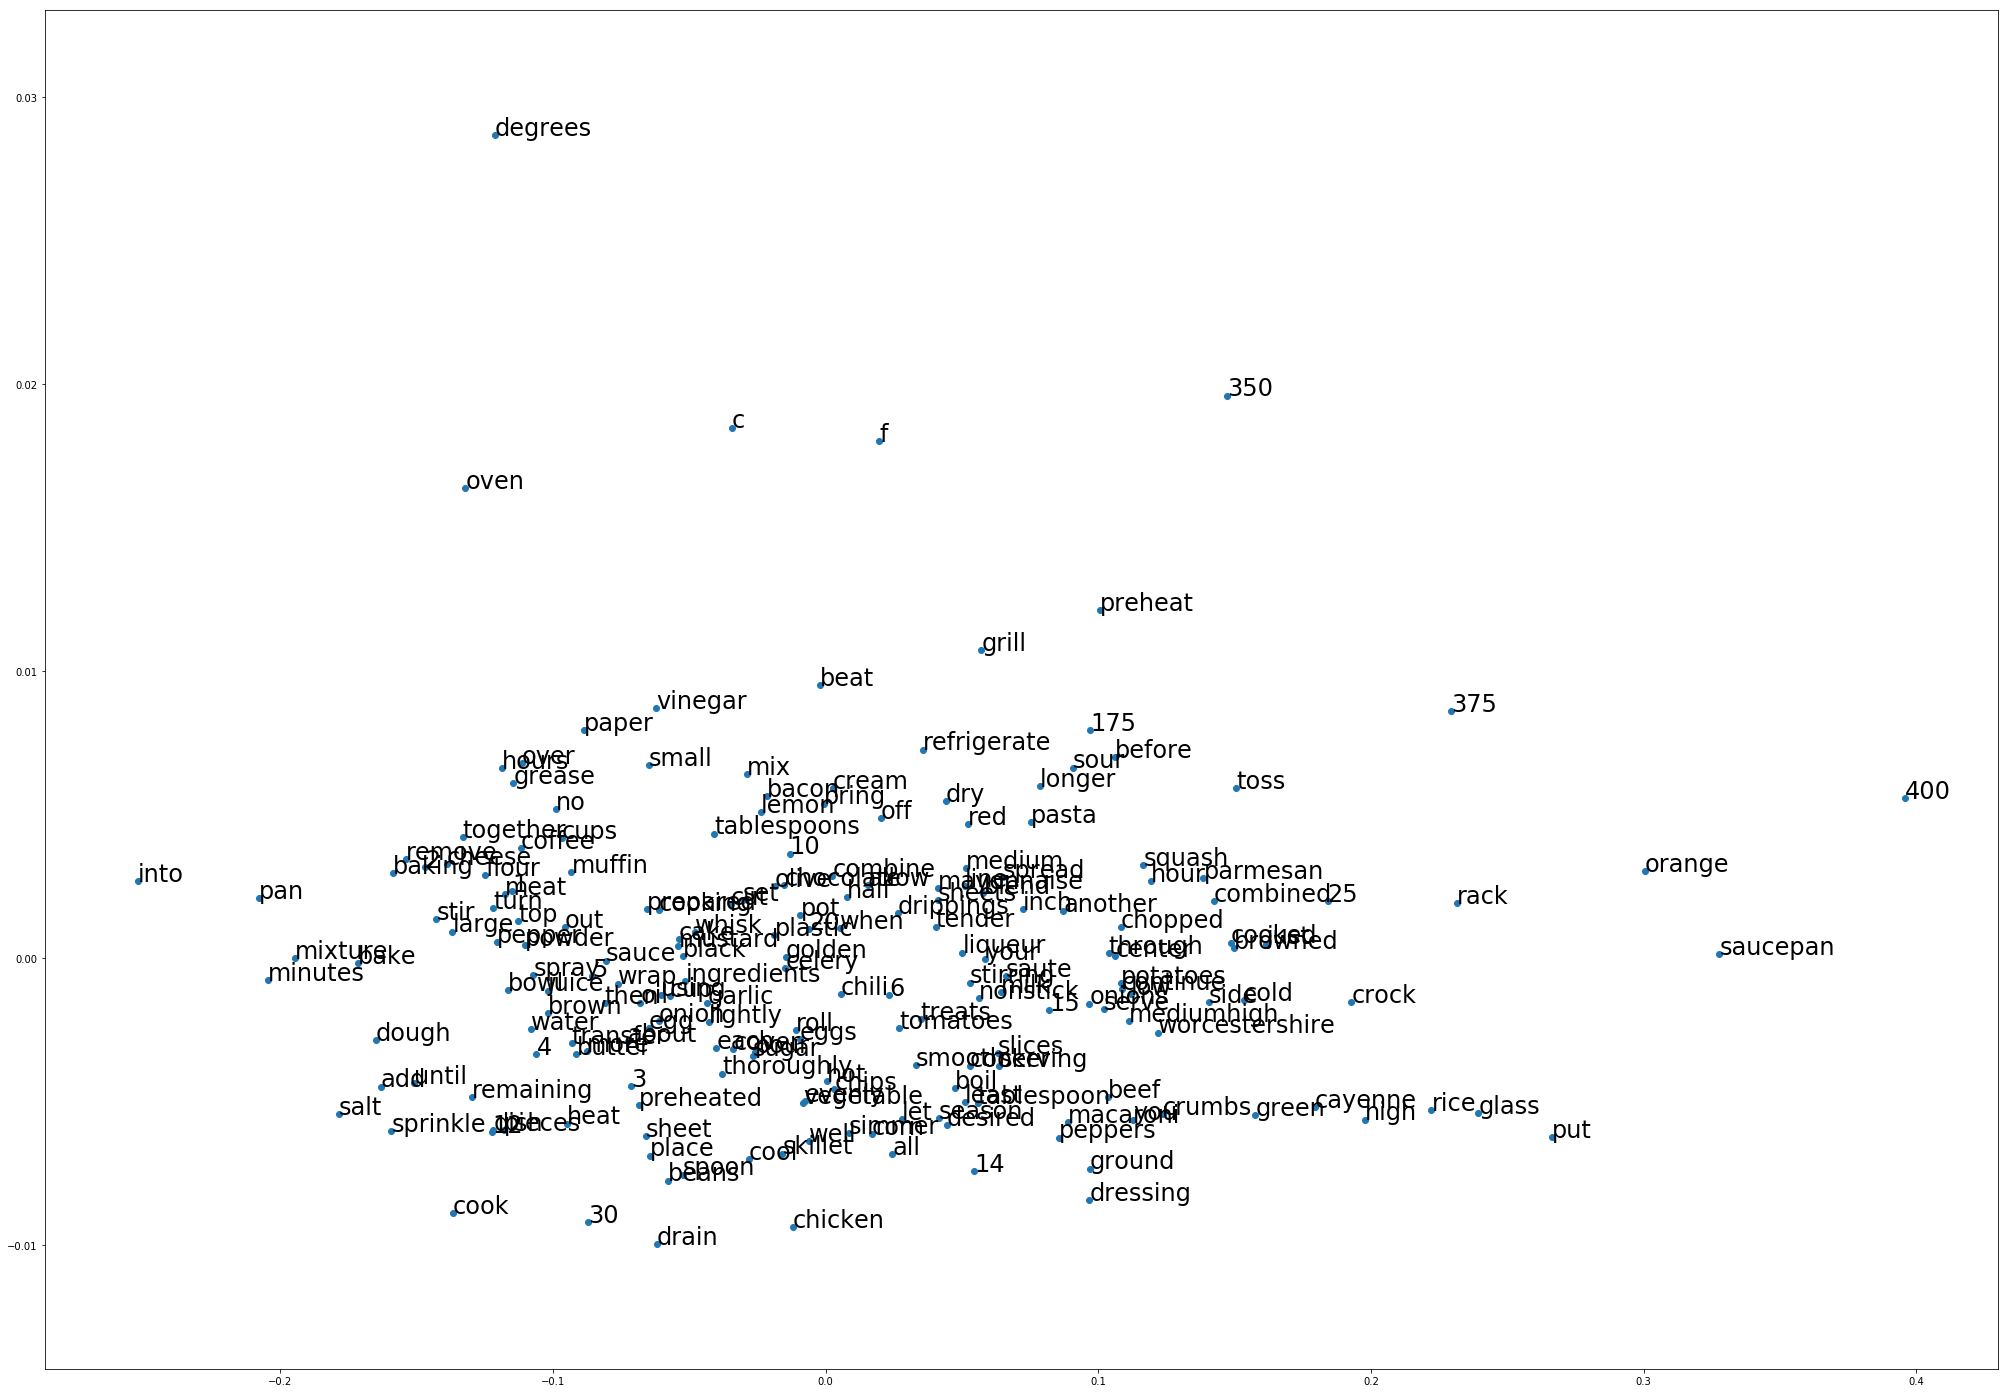

In [165]:
plt.figure(figsize=((35,25)))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(pca_data[i, 0], pca_data[i, 1]), fontsize=24)


In [127]:
from sklearn import manifold

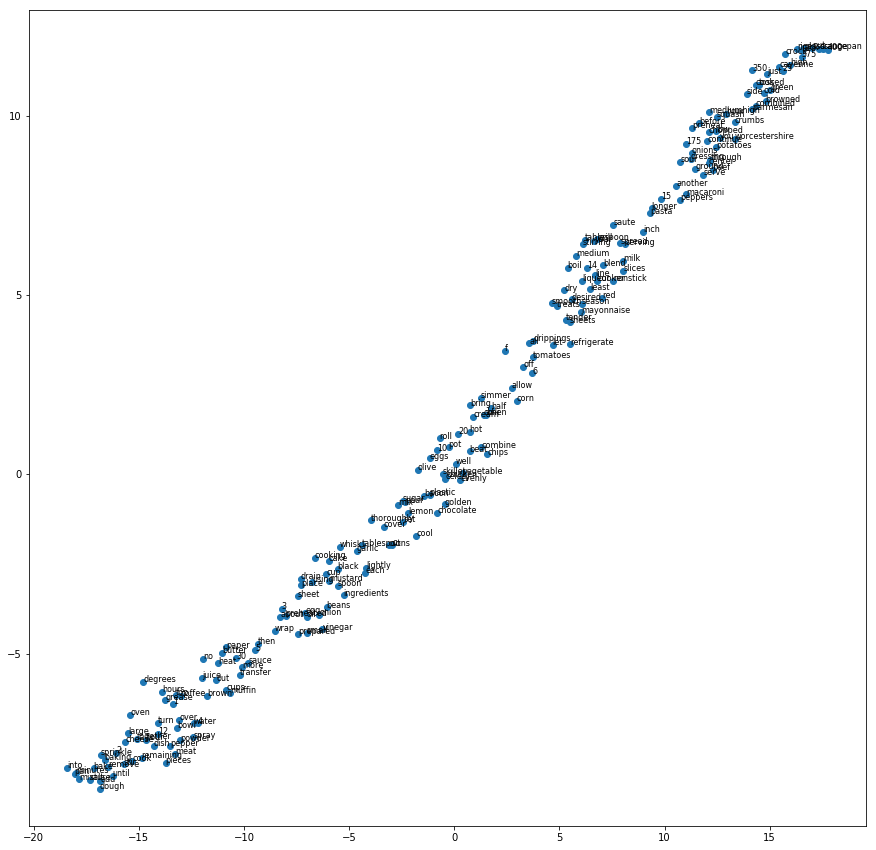

In [166]:
tsne = manifold.TSNE(n_components=2, init='pca', perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=((15,15)))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(tsne_data[i, 0], tsne_data[i, 1]), fontsize=8)


/Users/mnandi/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


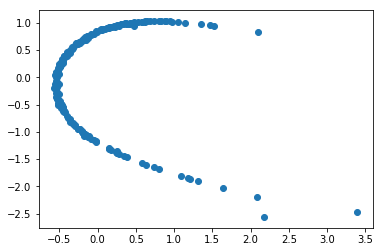

In [167]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

mds = manifold.MDS(2, max_iter=200, n_init=1)
distances = dist.pairwise(X)
mds_data = mds.fit_transform(distances)
plt.scatter(mds_data[:, 0], mds_data[:, 1])

In [168]:
# set up clustering estimators
from sklearn import cluster

dbscan = cluster.DBSCAN() 
meanshift = cluster.MeanShift()
spectral = cluster.SpectralClustering()
affinity = cluster.AffinityPropagation()

In [170]:
# dbscan with MDS data
scanned_x = dbscan.fit(mds_data)
scanned_x.labels_ 

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

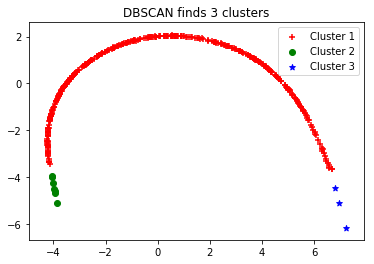

In [132]:
for i in range(0, mds_data.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

In [134]:
# lets see dbscan clusters for tsne
tsne_x = dbscan.fit(tsne_data)
tsne_x.labels_ 

array([-1, -1, -1, -1, -1, -1, -1,  2,  5, -1,  7,  0, 18,  7, -1, -1,  2,
        4, -1,  1, -1, -1, -1,  2, -1,  3, -1,  4, -1,  5, -1, -1,  4, 14,
       18,  4, -1, -1, -1, -1, 10, -1,  5,  4,  0, -1, 16, -1, 10, 14, 11,
       -1, -1,  9, -1, -1,  9, -1, -1, -1, -1, 29,  8, 20, -1,  6, -1, -1,
        4, -1, -1, -1,  6,  1, -1, -1, -1, 18,  7, -1,  4, -1, 15, 28,  4,
        3,  2, 20, -1,  0,  8, -1,  5,  9, -1, -1, 20, -1, 32, 14, -1, -1,
       -1,  0, -1, 10, -1, -1, 16, 26,  8, -1, 16,  4, -1,  3,  4, -1, -1,
       15, -1,  9, -1,  0, -1, -1, -1, -1, -1, 10, 11, -1, 11, 12, 13, 18,
       12, 14, -1, -1, -1,  8, 32, 15, -1, -1, -1, 29, -1, 22, -1, 13, 15,
       30, -1, -1,  8, -1,  7, -1, 26, 30, -1, -1, -1, -1, -1, 14, -1, 15,
        2, 16, -1, -1, 17, 17, 27, 15, -1, -1, 22, 21, -1, 18, -1, -1, -1,
       -1, -1, 19, 26, -1, -1, 31, 20,  9, 21, -1, 22, -1, 19, 11, -1, -1,
       -1, -1, 21,  8, -1, -1, 22, -1, 18, 15,  5, -1, 28, 28, 21, -1, -1,
       19,  7, 23, -1, 29

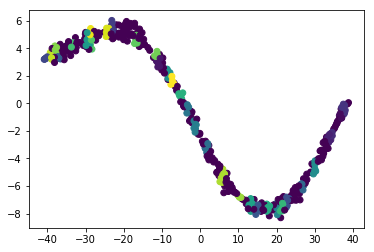

In [135]:
plt.scatter(tsne_data[:, 0], tsne_data[:,1], c = tsne_x.labels_)

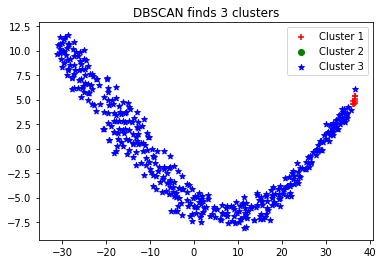

In [484]:
for i in range(0, tsne_data.shape[0]):
    if tsne_x.labels_[i] == 0:
        c1 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='r', marker='+')
    elif tsne_x.labels_[i] == 1:
        c2 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='g', marker='o')
    elif tsne_x.labels_[i] == -1:
        c3 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

In [485]:
# dbscan with MDS data
pca_dbscan = dbscan.fit(pca_data)
pca_dbscan.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

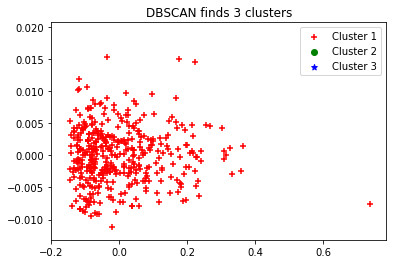

In [486]:
for i in range(0, pca_data.shape[0]):
    if pca_dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif pca_dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif pca_dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters')
plt.show()

In [43]:
meanshift_pca = meanshift.fit(pca_data)
meanshift_pca.labels_

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
meanshift_mds = meanshift.fit(mds_data)
meanshift_mds.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
meanshift_tsne = meanshift.fit(tsne_data)
meanshift_tsne.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0,
       2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1,
       0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,

In [52]:
meanshift_mds.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0,
       2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1,
       0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,

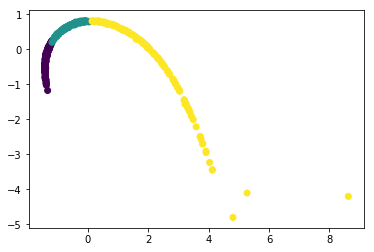

In [58]:
plt.scatter(mds_data[:, 0], mds_data[:,1], c = meanshift_mds.labels_)

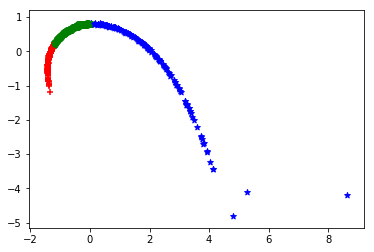

In [59]:
# mds
for i in range(0, mds_data.shape[0]):
    if meanshift_mds.labels_[i] == 0:
        c1 = plt.scatter(mds_data[i,0], mds_data[i,1], c='r', marker='+', label = "Cluster 1")
    elif meanshift_mds.labels_[i] == 1:
        c2 = plt.scatter(mds_data[i,0], mds_data[i,1], c='g', marker='o', label = "Cluster 2")
    elif meanshift_mds.labels_[i] == 2:
        c3 = plt.scatter(mds_data[i,0], mds_data[i,1], c='b', marker='*', label = "Cluster 3")
    elif meanshift_mds.labels_[i] == 3:
        c4 = plt.scatter(mds_data[i,0], mds_data[i,1], c='y', marker='^', label = "Cluster 4")

In [47]:
plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()

NameError: name 'c4' is not defined

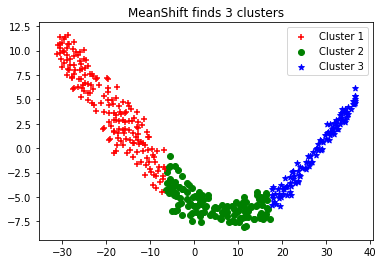

In [499]:
# tsne
for i in range(0, tsne_data.shape[0]):
    if meanshift_tsne.labels_[i] == 0:
        c1 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='r', marker='+')
    elif meanshift_tsne.labels_[i] == 1:
        c2 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='g', marker='o')
    elif meanshift_tsne.labels_[i] == 2:
        c3 = plt.scatter(tsne_data[i,0], tsne_data[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('MeanShift finds 3 clusters')
plt.show()

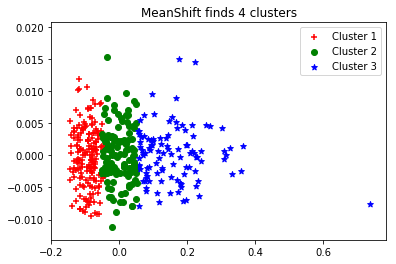

In [501]:
# pca
for i in range(0, pca_data.shape[0]):
    if meanshift_pca.labels_[i] == 0:
        c1 = plt.scatter(pca_data[i,0], pca_data[i,1], c='r', marker='+')
    elif meanshift_pca.labels_[i] == 1:
        c2 = plt.scatter(pca_data[i,0], pca_data[i,1], c='g', marker='o')
    elif meanshift_pca.labels_[i] == 2:
        c3 = plt.scatter(pca_data[i,0], pca_data[i,1], c='b', marker='*')
    elif meanshift_pca.labels_[i] == 3:
        c4 = plt.scatter(pca_data[i,0], pca_data[i,1], c='y', marker='^')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('MeanShift finds 4 clusters')
plt.show()

# Author Classification

In [171]:
raw_recipe_data.head()

,Author,Instructions,FullInstruction
0,witchywoman,[mix grapefruit orange apples pineapple marasc...,mix grapefruit orange apples pineapple marasch...
1,witchywoman,"[fill a margarita glass with crushed ice, pou...",fill a margarita glass with crushed ice pour t...
2,witchywoman,[preheat an oven to 350 degrees f 175 degrees ...,preheat an oven to 350 degrees f 175 degrees c...
4,witchywoman,[mix the teriyaki sauce garlic ginger and red ...,mix the teriyaki sauce garlic ginger and red p...
5,witchywoman,[fill a pint glass with ice and pour in the vo...,fill a pint glass with ice and pour in the vod...


In [ ]:
def setence_to_vector(instruction_paragraph):
    
    
    return vector

In [ ]:
X,y = InstructionVector, Author